In [9]:
import torchvision 
from torchvision import transforms 
import torch
from torch import no_grad

In [10]:
import requests

In [11]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [41]:
def get_predictions(pred, threshold=0.8, objects=None):
    """
    This function will assign a string name to a predicted class and eliminate predictions whose likelihood  is under a threshold 
    
    pred: a list where each element contains a tuple that corresponds to information about  the different objects; Each element includes a tuple with the class yhat, probability of belonging to that class and the coordinates of the bounding box corresponding to the object 
    image : frozen surface
    predicted_classes: a list where each element contains a tuple that corresponds to information about  the different objects; Each element includes a tuple with the class name, probability of belonging to that class and the coordinates of the bounding box corresponding to the object 
    thre
    """


    predicted_classes= [(COCO_INSTANCE_CATEGORY_NAMES[i],p,[(box[0], box[1]), (box[2], box[3])]) for i,p,box in zip(list(pred[0]['labels'].numpy()),pred[0]['scores'].detach().numpy(),list(pred[0]['boxes'].detach().numpy()))]
    predicted_classes=[  stuff  for stuff in predicted_classes  if stuff[1]>threshold ]
    
    if objects  and predicted_classes :
        predicted_classes=[ (name, p, box) for name, p, box in predicted_classes if name in  objects ]
    return predicted_classes

In [42]:
def draw_box(pred_class, img, rect_th=2, text_size=0.5, text_th=2, download_image=False, img_name="img"):
    """
    draws box around each object 
    
    predicted_classes: a list where each element contains a tuple that corresponds to information about the different objects; Each element includes a tuple with the class name, probability of belonging to that class and the coordinates of the bounding box corresponding to the object 
    image : frozen surface 
   
    """
    image = (np.clip(cv2.cvtColor(np.clip(img.numpy().transpose((1, 2, 0)), 0, 1), cv2.COLOR_RGB2BGR), 0, 1) * 255).astype(np.uint8).copy()

    for predicted_class in pred_class:
      
      label=predicted_class[0]
      probability=predicted_class[1]
      box=predicted_class[2]
      t = round(box[0][0].tolist())
      l = round(box[0][1].tolist())
      r = round(box[1][0].tolist())
      b = round(box[1][1].tolist())

      # Giving brief information about rectange, class and probability.
      from colorama import Fore
      from colorama import Style
      print(f"\nLabel: {Fore.GREEN}{label}{Style.RESET_ALL}")
      print(f"Box coordinates: {t}, {l}, {r}, {b}")
      print(f"Probability: {probability}")
      
      # Drawing rectangle and adding text on the picture based on their class and size.
      cv2.rectangle(image, (t, l), (r, b), (0, 255, 0), rect_th)
      cv2.rectangle(image, (t, l), (t+110, l+17), (255, 255, 255), -1)
      cv2.putText(image, label, (t+10, l+12),  cv2.FONT_HERSHEY_SIMPLEX, 
                  text_size, (0,255,0), thickness=text_th)
      cv2.putText(image, label+": "+str(round(probability, 2)), 
                  (t+10, l+12),  cv2.FONT_HERSHEY_SIMPLEX, text_size, 
                  (0, 255, 0),thickness=text_th)

    # Plotting image
    image = np.array(image)
    plt.figure(figsize=(15, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if download_image:
      plt.savefig(f'{img_name}.png')
    else:
      pass
    plt.show()
    
    del(img)
    del(image)

In [12]:
model_ = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model_.eval()

for name, param in model_.named_parameters():
    param.requires_grad = False
print("done")

C:\Users\thama\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\thama\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to C:\Users\thama/.cache\torch\hub\checkpoints\fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|███████████████████████████████████████████████████████████████████████████████| 160M/160M [01:02<00:00, 2.69MB/s]


done


In [13]:
model_ = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights='FasterRCNN_ResNet50_FPN_Weights.DEFAULT')
model_.eval()

for name, param in model_.named_parameters():
    param.requires_grad = False
print("done")

done


In [14]:
def model(x):
    with torch.no_grad():
        yhat = model_(x)
    return yhat

In [15]:
COCO_INSTANCE_CATEGORY_NAMES =[ 'background', 'person', 'bicycle', 'car', 'motorcycle',
                               'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
                               'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird',
                               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra',
                               'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag',
                               'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
                               'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
                               'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
                               'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog',
                               'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A',
                               'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse',
                               'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink',
                               'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
                               'hair drier', 'toothbrush' ]
len(COCO_INSTANCE_CATEGORY_NAMES)

91

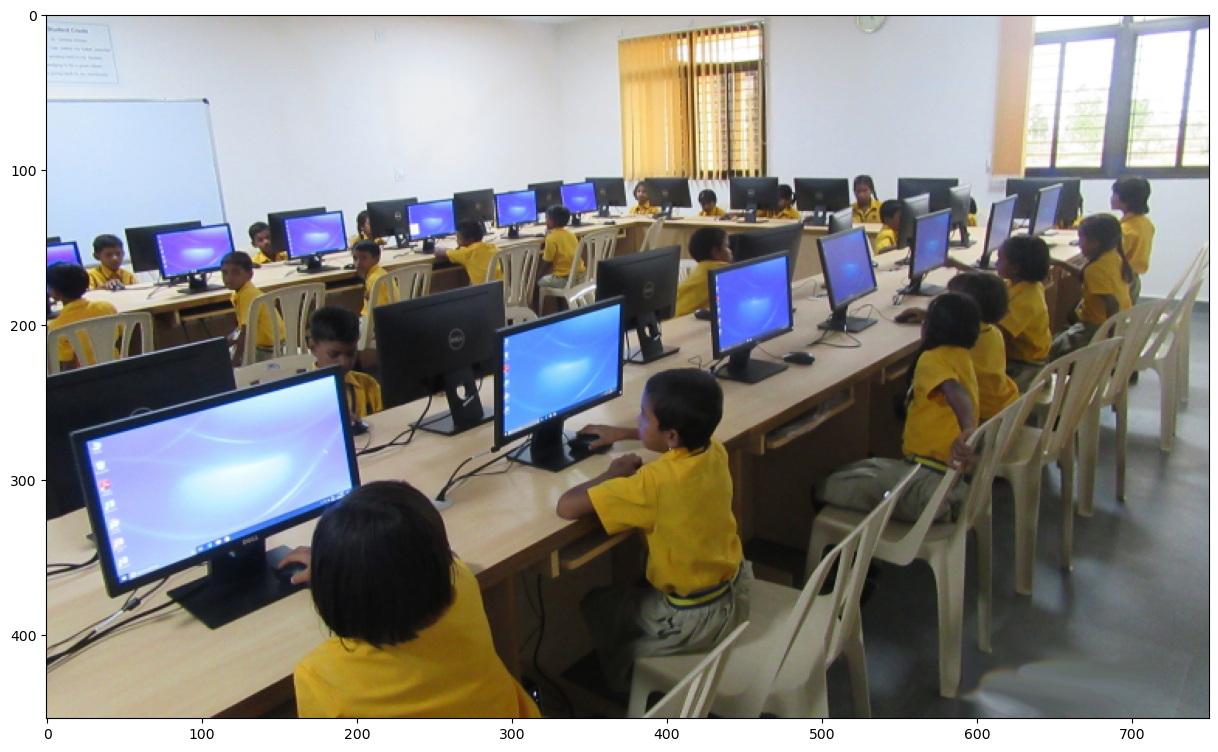

In [19]:
img_path='obj1.jpg'
half = 0.5
image = Image.open(img_path)

image.resize([int(half * s) for s in image.size] )
plt.figure(figsize=(15, 10))
plt.imshow(image)
plt.show()

In [21]:
transform=transforms.Compose([transforms.ToTensor()])

In [23]:
img=transform(image)

In [24]:
img

tensor([[[0.7961, 0.7961, 0.8039,  ..., 0.5647, 0.5333, 0.5647],
         [0.7922, 0.8000, 0.7961,  ..., 0.5608, 0.5725, 0.5882],
         [0.7765, 0.7882, 0.7765,  ..., 0.5765, 0.5804, 0.5843],
         ...,
         [0.7843, 0.7686, 0.7804,  ..., 0.3922, 0.4039, 0.4157],
         [0.7922, 0.7922, 0.7843,  ..., 0.4039, 0.4039, 0.4118],
         [0.7961, 0.7922, 0.7804,  ..., 0.4039, 0.4000, 0.4039]],

        [[0.8275, 0.8196, 0.8157,  ..., 0.5922, 0.5569, 0.5686],
         [0.8314, 0.8314, 0.8275,  ..., 0.5922, 0.5843, 0.6000],
         [0.8314, 0.8431, 0.8235,  ..., 0.6000, 0.5922, 0.5961],
         ...,
         [0.7490, 0.7451, 0.7451,  ..., 0.4353, 0.4392, 0.4510],
         [0.7490, 0.7490, 0.7490,  ..., 0.4471, 0.4471, 0.4549],
         [0.7451, 0.7490, 0.7373,  ..., 0.4471, 0.4431, 0.4588]],

        [[0.8784, 0.8745, 0.8824,  ..., 0.6549, 0.6196, 0.6471],
         [0.8706, 0.8824, 0.8784,  ..., 0.6431, 0.6431, 0.6588],
         [0.8667, 0.8863, 0.8784,  ..., 0.6627, 0.6588, 0.

In [25]:
pred=model([img])

In [26]:
len(pred[0]['labels'])

100

In [27]:
pred[0]['labels']

tensor([ 1,  1, 74, 72, 72, 72, 72, 62, 62, 72, 72,  1,  1, 72,  1, 72,  1,  1,
        72, 62,  1, 72,  1,  1,  1, 72,  1,  1, 72,  1,  1, 72,  1,  1,  1, 62,
        62, 72, 72, 72, 67,  1, 74, 62, 73, 62, 62, 62,  1, 62,  1, 62, 72, 72,
        73, 62, 62, 62,  1, 72, 62, 62, 62, 62, 72, 62, 72, 62, 62, 73, 62, 62,
        72, 62, 62, 73, 47,  1, 67, 72, 62, 62, 62, 73, 62,  1, 62, 62, 72, 76,
        62, 76, 73, 72, 72, 62, 62, 76, 73, 62])

In [28]:
pred[0]['scores']

tensor([0.9982, 0.9967, 0.9942, 0.9929, 0.9921, 0.9891, 0.9782, 0.9707, 0.9690,
        0.9678, 0.9629, 0.9536, 0.9511, 0.9451, 0.9444, 0.9443, 0.9408, 0.9361,
        0.9353, 0.9350, 0.9308, 0.9301, 0.9229, 0.9070, 0.9008, 0.8998, 0.8861,
        0.8699, 0.8625, 0.8538, 0.8534, 0.8527, 0.8424, 0.8352, 0.8259, 0.8066,
        0.8047, 0.7892, 0.7807, 0.7531, 0.7461, 0.7258, 0.6926, 0.6776, 0.6522,
        0.6420, 0.6392, 0.6381, 0.6226, 0.6164, 0.6108, 0.6031, 0.5959, 0.5903,
        0.5782, 0.5719, 0.5634, 0.5622, 0.5460, 0.5458, 0.5452, 0.5301, 0.5292,
        0.5200, 0.5113, 0.4759, 0.4702, 0.4663, 0.4645, 0.4634, 0.4532, 0.4419,
        0.4393, 0.4366, 0.4319, 0.3708, 0.3578, 0.3573, 0.3527, 0.3353, 0.3201,
        0.3060, 0.3047, 0.2994, 0.2839, 0.2832, 0.2768, 0.2738, 0.2674, 0.2652,
        0.2540, 0.2512, 0.2444, 0.2272, 0.2266, 0.2244, 0.2199, 0.2196, 0.2191,
        0.2174])

In [29]:
index=pred[0] ['labels'] [0].item()
COCO_INSTANCE_CATEGORY_NAMES[index]

'person'

In [30]:
bounding_box=pred[0]['boxes'][0].tolist()
bounding_box

[153.05645751953125, 299.337646484375, 313.1940612792969, 452.980224609375]

In [36]:
t,l,r,b = [round(x) for x in bounding_box]
print(t,l,r,b)

153 299 313 453


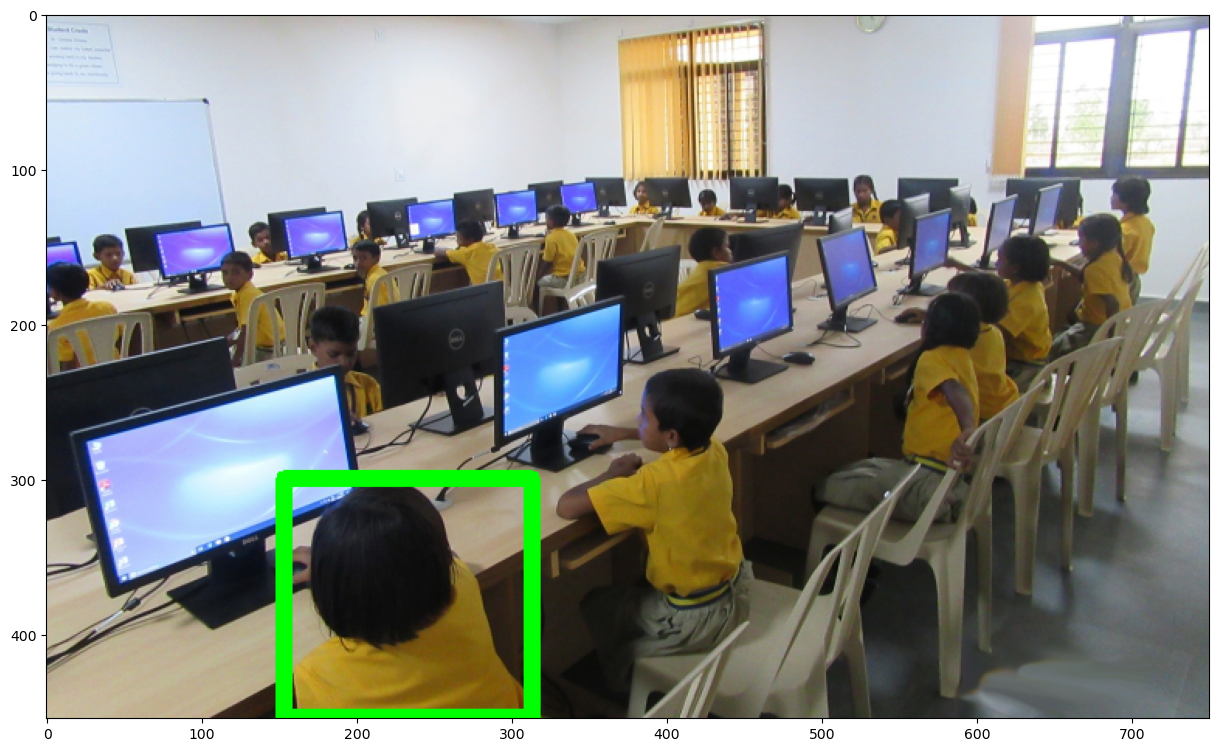

In [37]:
img_plot=(np.clip(cv2.cvtColor(np.clip(img.numpy().transpose((1, 2, 0)), 0, 1), cv2.COLOR_RGB2BGR), 0, 1) * 255).astype(np.uint8)
cv2.rectangle(img_plot, (t, l), (r, b), (0, 255, 0), 10) # Draw Rectangle with the coor

plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(img_plot, cv2.COLOR_BGR2RGB))
plt.show()
del img_plot,t,l,r,b


Label: person
Box coordinates: 153, 299, 313, 453
Probability: 0.9981831908226013

Label: person
Box coordinates: 328, 230, 456, 441
Probability: 0.9967443943023682

Label: person
Box coordinates: 686, 103, 715, 179
Probability: 0.9536078572273254

Label: person
Box coordinates: 547, 177, 608, 296
Probability: 0.9511401057243347

Label: person
Box coordinates: 405, 139, 443, 197
Probability: 0.9443869590759277

Label: person
Box coordinates: 25, 142, 60, 177
Probability: 0.9407511949539185

Label: person
Box coordinates: 657, 126, 704, 205
Probability: 0.9361162781715393

Label: person
Box coordinates: 315, 123, 345, 178
Probability: 0.9308074712753296

Label: person
Box coordinates: 610, 142, 651, 233
Probability: 0.9229377508163452

Label: person
Box coordinates: 165, 187, 218, 269
Probability: 0.9069510698318481

Label: person
Box coordinates: 130, 133, 154, 160
Probability: 0.9007775187492371

Label: person
Box coordinates: 504, 105, 546, 155
Probability: 0.8860920071601868

Label

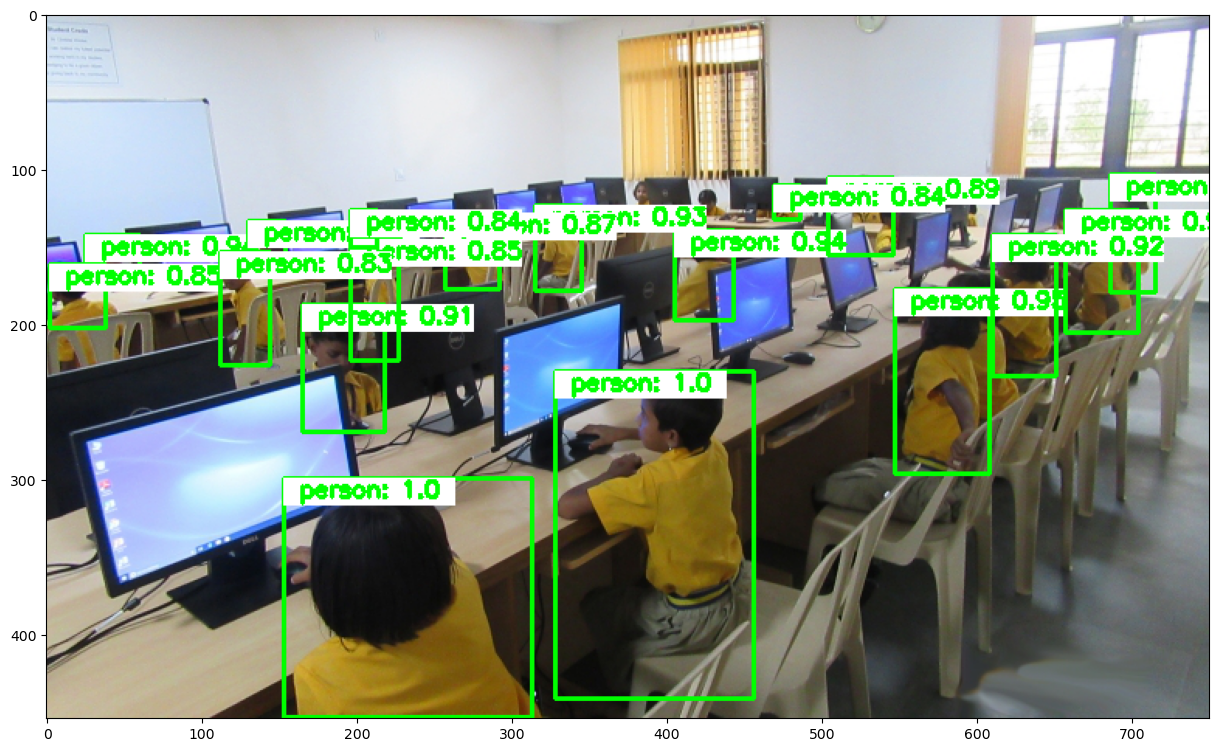

In [43]:
pred_class=get_predictions(pred, objects="person")
draw_box(pred_class, img)
del pred_class


Label: person
Box coordinates: 153, 299, 313, 453
Probability: 0.9981831908226013

Label: person
Box coordinates: 328, 230, 456, 441
Probability: 0.9967443943023682


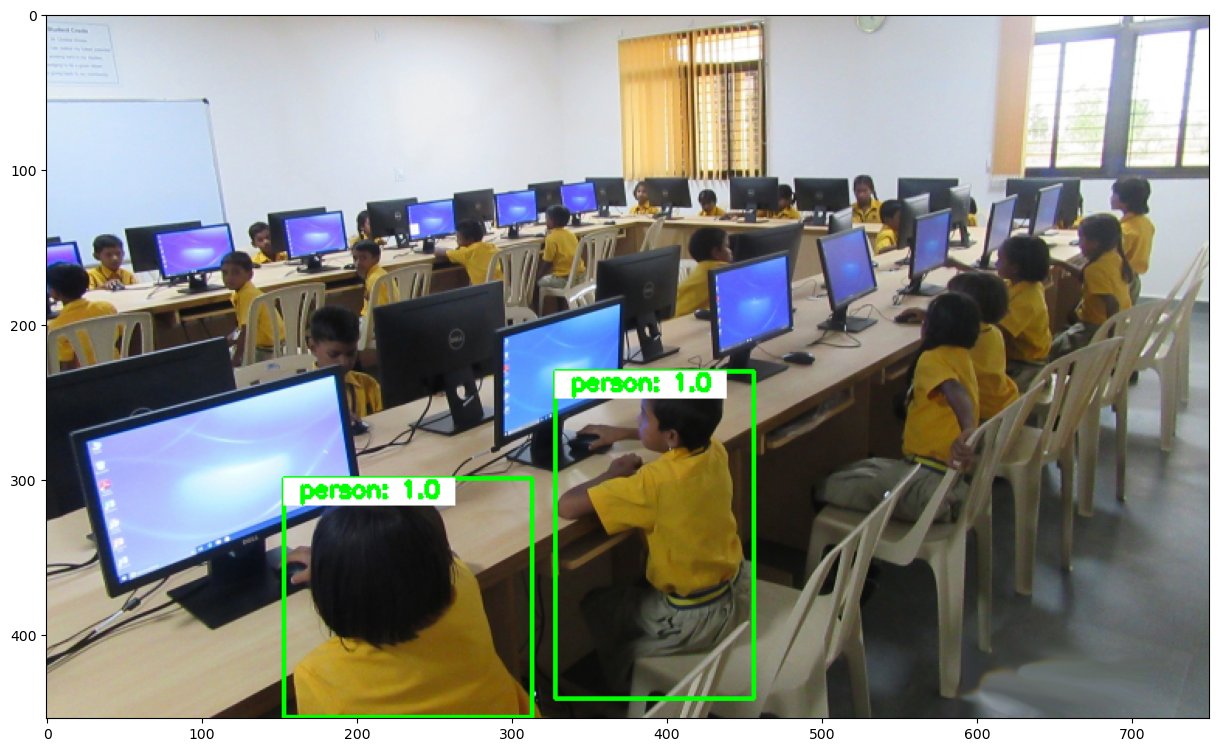

In [46]:
pred_thresh=get_predictions(pred, threshold=0.98, objects="person")
draw_box(pred_thresh, img, download_image=True, img_name="obj1.jpg")

del pred_thresh